<a href="https://colab.research.google.com/github/MMZ0406/Final-/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
If we must named the hotest stock in the US market, besides the Telsa and Nivida, it must be ’FAANG‘. Inside the 'FAANG", Apple and Meta, as two of the most influential technology companies, consistently attract significant attention from both institutional and retail investors. Their quarterly earnings reports often act as catalysts for discussion on forums like Reddit’s r/WallStreetBets, where individual investors analyze and share sentiments about these companies. While short-term sentiment shifts around specific earnings calls are insightful, the limited availability of relevant data makes it challenging to evaluate these events comprehensively. Instead, this study focuses on examining long-term sentiment trends—spanning 3 to 6 months before the current period—to assess whether the discussions and sentiment shifts on r/WallStreetBets align with the longer-term stock performance of Apple and Meta. By analyzing extended periods, this project seeks to uncover broader patterns of sentiment and their potential predictive value in relation to stock price changes.

The goal of this study is to investigate whether sentiment trends in online conversations align with stock performance expectations, providing valuable insights into how online communities reflect market dynamics.

# **Research Question and Objective**
Our goal is to investigate whether long-term sentiment trends in Reddit discussions align with the stock performance of Apple and Meta, providing insights into the influence of online communities on market dynamics. Specifically, this research examines Reddit discussions on r/WallStreetBets over a 3–6 month period to understand how sentiment correlates with stock price changes.

This study will test two primary hypotheses:

Positive sentiment in Reddit discussions during a 3–6 month period is

1.   Positive sentiment in Reddit discussions during a 3–6 month period is associated with an increase in Apple and Meta stock prices over the same timeframe.List item
2.   Negative sentiment or skepticism in Reddit discussions during a 3–6 month period is associated with a stagnation or decline in Apple and Meta stock prices.

# **Data Collection**
The data for this project will be sourced from Reddit’s r/WallStreetBets, a highly active community where individual investors discuss stock trends, news, and earnings. To gather relevant posts and comments, I will use the Pushshift API, which allows historical data retrieval, supplemented by the PRAW (Python Reddit API Wrapper) for direct access to Reddit’s live data if Pushshift’s access becomes restricted. This dual approach ensures reliability and completeness in data collection.The following area as our source.

**Link to original post**

> Meta Platforms https://www.reddit.com/r/stocks/comments/1e5mt3u/meta_holders_earnings_in_two_weeks_whats_your_plan/

> Apple
https://www.reddit.com/r/personalfinance/comments/1dpxhrp/sell_or_keep_apple_lots_of_apple_stock/

Rather than focusing on “major storm seasons,” I will define specific earnings announcement dates for each FAANG company and collect discussions from a 10-day window—5 days before and 5 days after each earnings announcement. This time frame captures both anticipatory sentiment and reactions. Posts will be filtered using keywords related to each company (e.g., “Apple,” “Amazon,” “FAANG”) to ensure relevance.

In addition to Reddit data, historical stock prices for the corresponding earnings periods will be retrieved from platforms such as Yahoo Finance or Alpha Vantage. This will provide the necessary context for analyzing sentiment’s correlation with stock price movements during the specified time frames.

# **Data Analysis**

# **META**

**DATA Cleaning**


The first step is conduct the data cleaning.  First, all text will be converted to lowercase for uniformity, and non-text elements such as URLs, special characters, and emojis will be removed to reduce noise.

The text will then be tokenized, splitting it into individual words, followed by the removal of common stop words that do not carry significant meaning. Next, lemmatization will be applied to reduce words to their base forms, ensuring consistency across different word variations.

Finally, the cleaned tokens will be rejoined into coherent text, preparing the data for accurate sentiment analysis and further processing.

In [ ]:
import asyncio
import asyncpraw
import json
import pandas as pd

reddit = asyncpraw.Reddit(
    client_id="mwtN160vn3Ga_9XlUqdy0g",
    client_secret="bBDQ2wCi6aR7nvmvazQtt_4tGgLHDA",
    user_agent="MayAnalysisApp by u/Low_Toe8799",
)

post_url = "https://www.reddit.com/r/stocks/comments/1e5mt3u/meta_holders_earnings_in_two_weeks_whats_your_plan/"

async def get_reddit_data():
    """
    Fetches post details and comments from a Reddit post asynchronously.
    """
    global submission # Declare submission as global to modify it within the function
    print("Fetching post details...")
    submission = await reddit.submission(url=post_url) # Await the coroutine

    post_details = {
        "title": submission.title,
        "selftext": submission.selftext,
        "author": submission.author.name if submission.author else "Deleted",
        "score": submission.score,
        "created_utc": submission.created_utc
    }

    # Print the post details
    print("Post Details:")
    print(json.dumps(post_details, indent=4))

    # Fetch comments
    print("Fetching comments...")
    await submission.comments.replace_more(limit=None)  # Ensure all comments are fetched
    comments = []
    async for comment in submission.comments: # Iterate through comments asynchronously
        comments.append({
            "id": comment.id,
            "body": comment.body,
            "author": comment.author.name if comment.author else "Deleted",
            "score": comment.score,
            "created_utc": comment.created_utc
        })

    # Save post details to a JSON file
    with open("post_details.json", "w") as f:
        json.dump(post_details, f, indent=4)
    print("Post details saved to 'post_details.json'")

    # Save comments to a CSV file
    comments_df = pd.DataFrame(comments)
    comments_df.to_csv("comments.csv", index=False)
    print("Comments saved to 'comments.csv'")

    return comments_df

comments_df = asyncio.run(get_reddit_data())

Fetching post details...
Post Details:
{
    "title": "META holders: Earnings in two weeks. What's your plan?",
    "selftext": "I've been holding META since $120-130 and wondering if I should sell a portion/half of my holdings. Right now tech stocks are getting reamed, but I also have a relatively low cost basis.  What are you guys thinking of doing? I feel like in the long term META will do fine, but short term/mid term seems like the stock market as a whole is going to continue to get battered. This period might be extended depending on how the election goes and trade restrictions. Any thoughts?",
    "author": "lawyermom112",
    "score": 53,
    "created_utc": 1721234369.0
}
Fetching comments...
Post details saved to 'post_details.json'
Comments saved to 'comments.csv'


After subscrabing the data, we performed the data cleaning process.

**Remove Null or Missing Data**:
Drop comments or fields with missing values (body, author, etc.). Handle Deleted or Removed Comments:
Exclude rows where the body field contains [deleted] or [removed].

**Standardize Text**:
Convert text to lowercase for consistency. Remove URLs, special characters, and extra spaces using regex.

In [ ]:
# Clean comments data
comments_df = comments_df[~comments_df["body"].isin(["[deleted]", "[removed]"])]
comments_df["body"] = comments_df["body"].str.lower().str.replace(r"http\S+", "", regex=True).str.replace(r"[^\w\s]", "", regex=True).str.strip()

# Save the cleaned comments
comments_df.to_csv("cleaned_comments.csv", index=False)
print("Cleaned comments saved to 'cleaned_comments.csv'")

Cleaned comments saved to 'cleaned_comments.csv'


Prepare the cleaned comments for analysis:

**Tokenization**: Split text into individual words or tokens.

**Stopword Removal**: Remove common words (e.g., "the", "is", "and") that don’t add meaning.

**Stemming/Lemmatization**: Reduce words to their root forms (e.g., "running" → "run").

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the 'punkt' and 'punkt_tab' resources for sentence tokenization
nltk.download("punkt")
nltk.download("punkt_tab")

# Tokenize and remove stopwords
stop_words = set(stopwords.words("english"))
comments_df["tokens"] = comments_df["body"].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Save tokenized comments
comments_df.to_csv("tokenized_comments.csv", index=False)
print("Tokenized comments saved to 'tokenized_comments.csv'")

Tokenized comments saved to 'tokenized_comments.csv'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import asyncio
import asyncpraw
import json
import pandas as pd

# ... (Your Reddit credentials and setup) ...

# Update the post URL
post_url = "https://www.reddit.com/r/stocks/comments/1cn5fpj/are_you_worried_about_aapl_long_term/"

async def get_reddit_data():
    # Add code here to fetch and process Reddit data
    # This is where you would use asyncpraw to interact with the Reddit API
    # and extract the data you need, likely into a pandas DataFrame.
    # Example:
    submission = await reddit.submission(url=post_url) # Assuming 'reddit' is your asyncpraw Reddit instance
    comments = await submission.comments() # Fetch all comments from the submission

    # Create a list to store comment data
    all_comments = []
    async for comment in comments:
        all_comments.append({"body": comment.body})

    # Create a pandas DataFrame from the collected comments
    comments_df = pd.DataFrame(all_comments)

    return comments_df # Return the created DataFrame

# Run the asynchronous function and assign the result to comments_df
comments_df = asyncio.run(get_reddit_data())

# Clean comments data
comments_df = comments_df[~comments_df["body"].isin(["[deleted]", "[removed]"])]
comments_df["body"] = comments_df["body"].str.lower().str.replace(r"http\S+", "", regex=True).str.replace(r"[^\w\s]", "", regex=True).str.strip()


**sentiment Analysis**

Sentiment analysis will be conducted to evaluate the tone of Reddit discussions related to Apple and Meta over a 3–6 month period. Using a pre-trained model such as VADER, each comment will be assigned a sentiment score, categorizing it as positive, negative, or neutral. The aggregated sentiment scores will provide an overall measure of community sentiment during this timeframe. This analysis will help identify whether trends in sentiment align with stock performance, offering insights into the predictive power of online discussions in shaping market behavior.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
comments_df["sentiment"] = comments_df["body"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Save sentiments
comments_df.to_csv("sentiment_analysis.csv", index=False)
print("Sentiment analysis results saved to 'sentiment_analysis.csv'")


Sentiment analysis results saved to 'sentiment_analysis.csv'


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def adjust_sentiment(comment, vader_score):
    if "short squeeze" in comment.lower():
        vader_score += 0.3  # Increase sentiment score
    elif "dump it" in comment.lower():
        vader_score -= 0.3  # Decrease sentiment score
    return vader_score

In [ ]:
# Aggregate sentiment
average_sentiment = comments_df["sentiment"].mean()
positive_comments = comments_df[comments_df["sentiment"] > 0].shape[0]
negative_comments = comments_df[comments_df["sentiment"] < 0].shape[0]

print(f"Average Sentiment: {average_sentiment}")
print(f"Positive Comments: {positive_comments}")
print(f"Negative Comments: {negative_comments}")


Average Sentiment: 0.12629772727272728
Positive Comments: 21
Negative Comments: 12


From the sentiment analysis, we see that most comments are positive, which reflect a "buy" attitude towards the META stock. Let's visualize the data. The distribution is shown below.

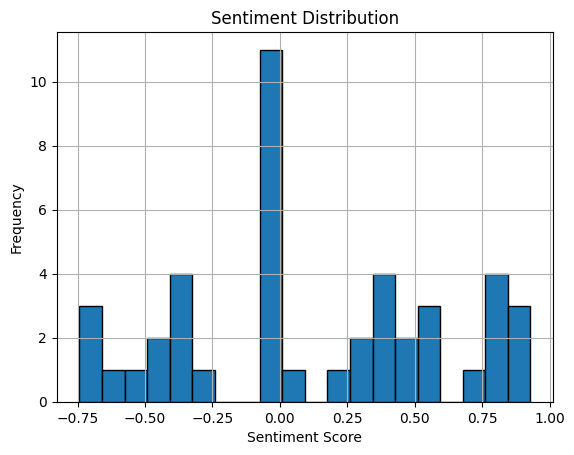

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
comments_df["sentiment"].hist(bins=20, edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


**Term Frequency and TF-IDF Analysis**



TF measures how frequently a term appears in a document. It's calculated as the number of times a term appears in a document divided by the total number of terms in that document.

In [ ]:
from collections import Counter

def calculate_tf(tokens):
    """Calculates Term Frequency for a list of tokens."""
    term_counts = Counter(tokens)
    total_tokens = len(tokens)
    tf_scores = {term: count / total_tokens for term, count in term_counts.items()}
    return tf_scores

comments_df["tf_scores"] = comments_df["tokens"].apply(calculate_tf)

**TF-IDF**

TF-IDF goes a step further by considering the importance of a term across the entire corpus (collection of documents). It weighs down terms that are frequent across all documents (e.g., common words) and emphasizes terms that are specific to a particular document.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf(corpus):
    """Calculates TF-IDF scores for a corpus of documents."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_scores

# Prepare the corpus (list of comments)
corpus = comments_df["body"].tolist()

# Calculate TF-IDF scores
tfidf_scores = calculate_tfidf(corpus)

# Combine TF-IDF scores with comments DataFrame
comments_df = pd.concat([comments_df, tfidf_scores], axis=1)

In [ ]:
def get_top_terms(row, top_n=10):
    """Gets top N terms by TF-IDF score for a row."""
    tfidf_series = row.drop(comments_df.columns[:len(comments_df.columns) - len(tfidf_scores.columns)]) # Get TF-IDF values only
    top_terms = tfidf_series.sort_values(ascending=False)[:top_n].index.tolist()
    return top_terms

comments_df["top_terms"] = comments_df.apply(get_top_terms, axis=1)

In [ ]:
print("TF calculation complete")


display(comments_df.head())

TF calculation complete


,id,body,author,score,created_utc,tokens,sentiment,tf_scores,10,113,...,worth,would,wouldnt,year,years,you,youll,your,zuck,zuckerberg
0,ldmw4me,im not a meta holder so my plan is to watch it...,notreallydeep,138,1.721235e+09,"[im, meta, holder, plan, watch, go, even, high...",-0.4767,"{'im': 0.1, 'meta': 0.1, 'holder': 0.1, 'plan'...",0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,ldmv5o5,if you believe in the company long term dont s...,leaning_on_a_wheel,82,1.721235e+09,"[believe, company, long, term, dont, sell, unl...",0.0000,"{'believe': 0.1111111111111111, 'company': 0.1...",0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.451964,0.0,0.0,0.000000,0.0
2,ldn3wnb,my plan is to hold and wait i think meta will...,One-Journalist-213,28,1.721238e+09,"[plan, hold, wait, think, meta, cut, operating...",-0.2732,"{'plan': 0.05, 'hold': 0.05, 'wait': 0.05, 'th...",0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,ldppgsr,no competition in core business better ai offe...,nobertan,21,1.721270e+09,"[competition, core, business, better, ai, offe...",0.0240,"{'competition': 0.02040816326530612, 'core': 0...",0.0,0.0,...,0.0,0.0,0.119298,0.110042,0.0,0.000000,0.0,0.0,0.000000,0.0
4,ldpqnvz,going up zuck wont have posted his suited pho...,hil_ton,22,1.721271e+09,"[going, zuck, wont, posted, suited, photo, jul...",-0.4019,"{'going': 0.058823529411764705, 'zuck': 0.0588...",0.0,0.0,...,0.0,0.0,0.000000,0.196043,0.0,0.000000,0.0,0.0,0.183254,0.0


**Frequency word**



We perform frequency word anlysis to identify the most commonly used words in Reddit discussions about Apple and Meta stocks. By aggregating and analyzing tokens from user comments, we identified key terms such as "going," "buy," "sell," "earnings," and "stock." These frequent words reflect user attitudes and focal points, such as buying intentions, concerns over stock performance, and discussions around earnings. This analysis provides insights into the themes dominating Reddit conversations, helping to contextualize sentiment trends and their potential influence on stock price movements.

In [ ]:
from collections import Counter

# Combine all tokens into a single list
all_tokens = [token for tokens_list in comments_df["tokens"] for token in tokens_list]

# Calculate word frequencies
word_frequencies = Counter(all_tokens)

# Get the most common words
most_common_words = word_frequencies.most_common(10)  # Get top 10

# Print the results
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

going: 17
meta: 16
buy: 16
long: 10
sell: 10
ai: 9
earnings: 9
shares: 9
stock: 8
holding: 8


The bar chart visualizes the top 10 most frequently mentioned words in Reddit discussions about Apple and Meta stocks. The x-axis represents the frequency of each word, while the y-axis lists the words. Key terms such as "going," "meta," "buy," and "sell" appear prominently, indicating prevalent themes in the conversations, including investment intentions and stock-related analysis. This visualization highlights the dominant topics in user discussions, providing insights into investor sentiment and focus areas within the community.

<ipython-input-128-a7914a0f31ea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis") # Use a color palette


Text(0.5, 1.0, 'Top')

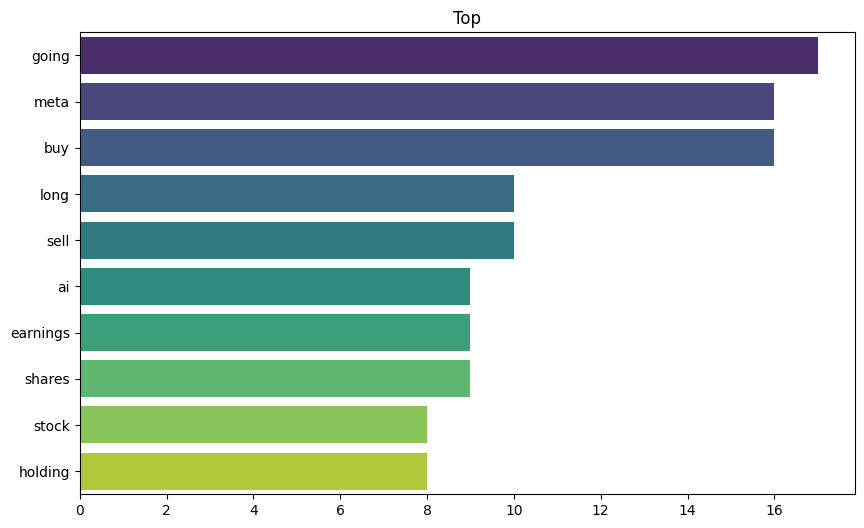

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N most common words (e.g., top 10)
top_n = 10  # Adjust as needed
most_common_words = word_frequencies.most_common(top_n)

# Extract words and frequencies for plotting
words = [word for word, frequency in most_common_words]
frequencies = [frequency for word, frequency in most_common_words]

# Create the bar chart using seaborn (better aesthetics)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=frequencies, y=words, palette="viridis") # Use a color palette
plt.title(f"Top")

The word cloud visualizes the most frequent words in Reddit discussions related to Meta stock. Prominent terms like "going," "buy," "meta," and "company" are prominently displayed, reflecting the focus of the discussions on investment actions and company performance. The size of the words corresponds to their frequency, highlighting the dominance of themes like buying opportunities, stock movements, and long-term holding strategies. This visualization provides an intuitive overview of the key topics driving community conversations, offering insights into the collective sentiment and priorities of investors.

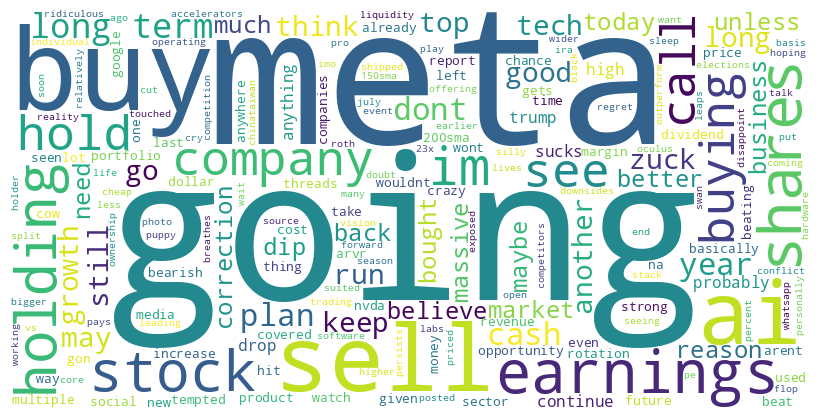

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ... (Your previous code to calculate word frequencies) ...

# Combine all tokens into a single string
all_words = ' '.join([token for tokens_list in comments_df["tokens"] for token in tokens_list])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

From the word frequency analysis, we observe that Reddit discussions frequently suggest buying or holding Meta stock, reflecting positive sentiment towards the company's performance. Is the Price of the stock go up? Below is the 6 month price chart of the Meta Stock.

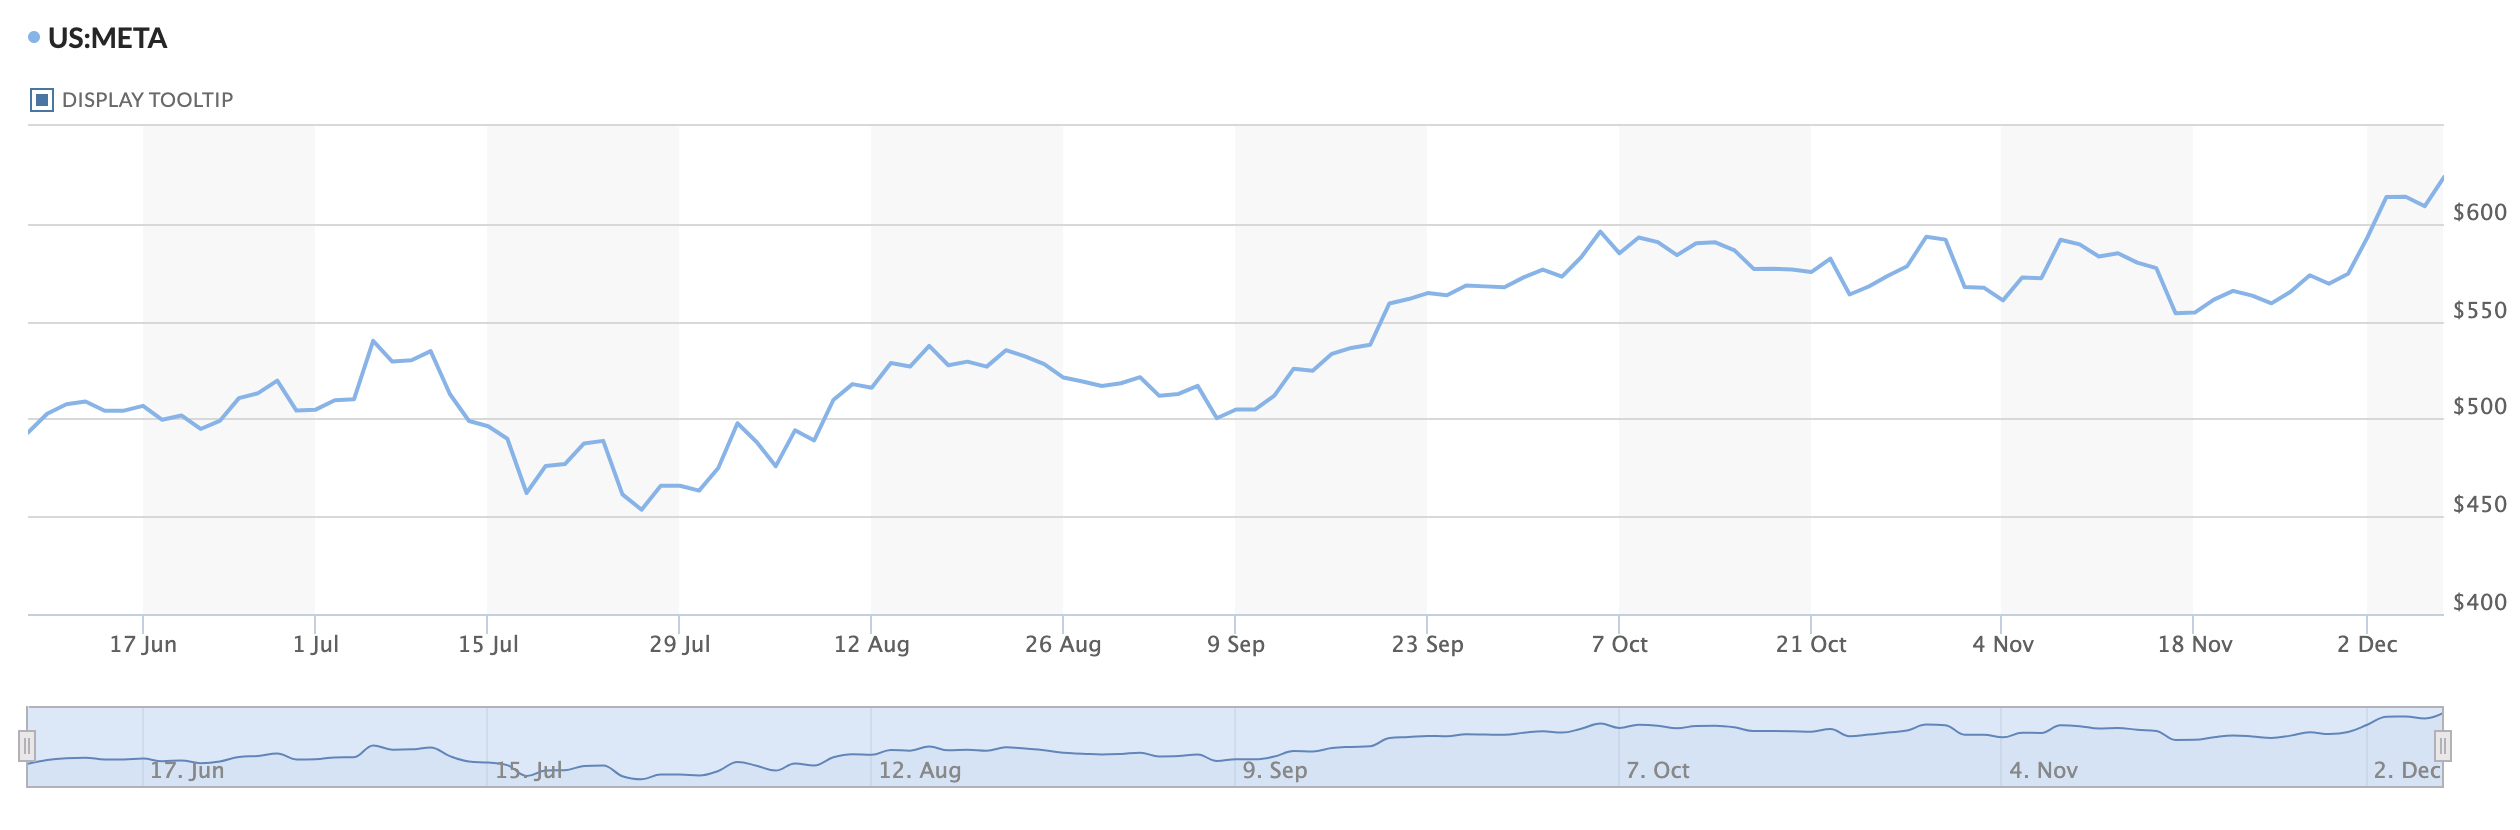

The 6-month price chart of Meta stock supports this sentiment, showing a significant increase from 492.96 dollar to 623.77 dollar. Despite occasional fluctuations, the long-term trend indicates consistent growth, aligning with the optimistic attitudes expressed on Reddit. This correlation suggests that long-term sentiment on online platforms like Reddit may provide valuable insights into stock price movements.

## **APPLE**

We performed the same data cleaning step to process the APPLE data.

In [ ]:
import asyncio
import asyncpraw
import json
import pandas as pd

# ... (Your Reddit credentials and setup) ...

# Update the post URL
post_url = "https://www.reddit.com/r/stocks/comments/1cn5fpj/are_you_worried_about_aapl_long_term/"

async def get_reddit_data():
    # Add code here to fetch and process Reddit data
    # This is where you would use asyncpraw to interact with the Reddit API
    # and extract the data you need, likely into a pandas DataFrame.
    # Example:
    submission = await reddit.submission(url=post_url) # Assuming 'reddit' is your asyncpraw Reddit instance
    comments = await submission.comments() # Fetch all comments from the submission

    # Create a list to store comment data
    all_comments = []
    async for comment in comments:
        all_comments.append({"body": comment.body})

    # Create a pandas DataFrame from the collected comments
    comments_df = pd.DataFrame(all_comments)

    return comments_df # Return the created DataFrame

# Run the asynchronous function and assign the result to comments_df
comments_df = asyncio.run(get_reddit_data())

# Clean comments data
comments_df = comments_df[~comments_df["body"].isin(["[deleted]", "[removed]"])]
comments_df["body"] = comments_df["body"].str.lower().str.replace(r"http\S+", "", regex=True).str.replace(r"[^\w\s]", "", regex=True).str.strip()


In [ ]:
comments_df = comments_df[~comments_df["body"].isin(["[deleted]", "[removed]"])]
comments_df["body"] = comments_df["body"].str.lower().str.replace(r"http\S+", "", regex=True).str.replace(r"[^\w\s]", "", regex=True).str.strip()

comments_df.to_csv("cleaned_comments2.csv", index=False)
print("Cleaned comments saved to 'cleaned_comments2.csv'")

Cleaned comments saved to 'cleaned_comments2.csv'


**Sentiment analysis**

Using the VADER sentiment analysis tool, we evaluated Reddit discussions about Apple stock to assess overall community sentiment. The analysis revealed an average sentiment score of 0.2478, indicating a generally positive tone in discussions. Out of the analyzed comments, 98 were classified as positive, while 37 were classified as negative. This suggests that the Reddit community holds an optimistic outlook on Apple stock, which aligns with observed discussions emphasizing buying and holding strategies. The sentiment analysis provides valuable insights into investor perspectives, helping to understand the broader market sentiment surrounding Apple.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("punkt_tab")

stop_words = set(stopwords.words("english"))
comments_df["tokens"] = comments_df["body"].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Save tokenized comments
comments_df.to_csv("tokenized_comments2.csv", index=False)
print("Tokenized comments2 saved to 'tokenized_comments2.csv'")

Tokenized comments2 saved to 'tokenized_comments2.csv'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def adjust_sentiment(comment, vader_score):
    if "short squeeze" in comment.lower():
        vader_score += 0.3  # Increase sentiment score
    elif "dump it" in comment.lower():
        vader_score -= 0.3  # Decrease sentiment score
    return vader_score

In [ ]:
!pip install nltk
!pip install vaderSentiment
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Use compound score

# Apply sentiment analysis to the 'body' column and create a new 'sentiment' column
comments_df['sentiment'] = comments_df['body'].apply(get_sentiment)

# Now you can calculate the average sentiment:
average_sentiment = comments_df["sentiment"].mean()
positive_comments = comments_df[comments_df["sentiment"] > 0].shape[0]
negative_comments = comments_df[comments_df["sentiment"] < 0].shape[0]

print(f"Average Sentiment: {average_sentiment}")
print(f"Positive Comments: {positive_comments}")
print(f"Negative Comments: {negative_comments}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
Average Sentiment: 0.2478224242424243
Positive Comments: 98
Negative Comments: 37


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


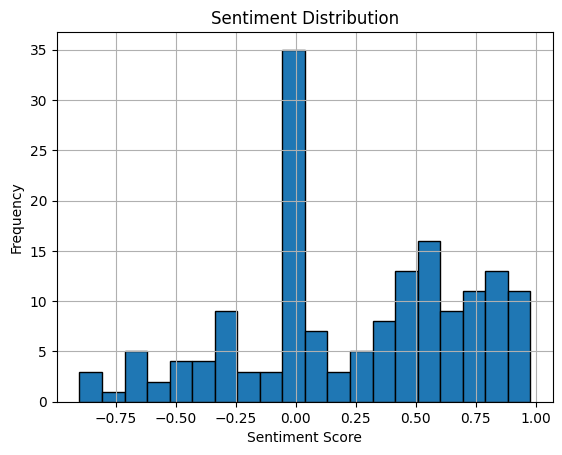

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
comments_df["sentiment"].hist(bins=20, edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

**Term Frequency and TF-IDF Analysis**

In [ ]:
from collections import Counter

def calculate_tf(tokens):
    """Calculates Term Frequency for a list of tokens."""
    term_counts = Counter(tokens)
    total_tokens = len(tokens)
    tf_scores = {term: count / total_tokens for term, count in term_counts.items()}
    return tf_scores

comments_df["tf_scores"] = comments_df["tokens"].apply(calculate_tf)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf(corpus):
    """Calculates TF-IDF scores for a corpus of documents."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_scores

# Prepare the corpus (list of comments)
corpus = comments_df["body"].tolist()

# Calculate TF-IDF scores
tfidf_scores = calculate_tfidf(corpus)

# Combine TF-IDF scores with comments DataFrame
comments_df = pd.concat([comments_df, tfidf_scores], axis=1)

In [ ]:
def get_top_terms(row, top_n=10):
    """Gets top N terms by TF-IDF score for a row."""
    tfidf_series = row.drop(comments_df.columns[:len(comments_df.columns) - len(tfidf_scores.columns)]) # Get TF-IDF values only
    top_terms = tfidf_series.sort_values(ascending=False)[:top_n].index.tolist()
    return top_terms

comments_df["top_terms"] = comments_df.apply(get_top_terms, axis=1)

print("TF calculation complete")

display(comments_df.head())


TF calculation complete


,body,tokens,sentiment,tf_scores,00s,10,1015,11,12,13,...,yes,yesterday,yet,yields,you,your,yup,zephyr,zs,top_terms
0,its just a mature company now slow or low growth,"[mature, company, slow, low, growth]",0.5106,"{'mature': 0.2, 'company': 0.2, 'slow': 0.2, '...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,"[slow, low, mature, now, growth, company, just..."
1,they have 90ish percent of the teenyoung adult...,"[90ish, percent, teenyoung, adult, market, lik...",0.2146,"{'90ish': 0.047619047619047616, 'percent': 0.0...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,"[lifelong, 90ish, adult, percent, teenyoung, k..."
2,1 the vision pro is a dev kit apples end game ...,"[1, vision, pro, dev, kit, apples, end, game, ...",0.9747,"{'1': 0.009900990099009901, 'vision': 0.029702...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.053280,0.0,0.0,0.0,0.0,"[much, glasses, vision, how, pro, growth, in, ..."
3,you listed valid points but i still wouldnt be...,"[listed, valid, points, still, wouldnt, bet, t...",0.0000,"{'listed': 0.125, 'valid': 0.125, 'points': 0....",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.220264,0.0,0.0,0.0,0.0,"[listed, bet, valid, against, points, tim, wou..."
4,they invest enormously in rnd,"[invest, enormously, rnd]",0.0000,"{'invest': 0.3333333333333333, 'enormously': 0...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,"[rnd, enormously, invest, in, they, 00s, pop, ..."


**Frequency Word**

The frequency analysis highlights the most commonly discussed terms in Reddit comments related to Apple. "Apple" itself is the most frequent term, appearing 131 times, reflecting the centrality of the company in the discussion. Other notable terms include "iPhone" (36 mentions), indicating a focus on product offerings, and "growth" (33 mentions), which suggests attention to the company’s financial and market performance. Words like "think" and "new" (33 and 31 mentions, respectively) imply opinions or discussions about future prospects. This analysis provides a snapshot of key discussion points and themes surrounding Apple, showcasing what aspects of the company resonate most with the online community.

In [ ]:
from collections import Counter

# Combine all tokens into a single list
all_tokens = [token for tokens_list in comments_df["tokens"] for token in tokens_list]

# Calculate word frequencies
word_frequencies = Counter(all_tokens)

# Get the most common words
most_common_words = word_frequencies.most_common(10)  # Get top 10

# Print the results
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

apple: 131
iphone: 36
growth: 33
think: 33
new: 31
like: 31
market: 30
im: 30
long: 30
company: 28


The bar chart illustrates the top 10 most frequently used words in Reddit discussions related to Apple. As expected, "apple" dominates the chart with the highest frequency, followed by terms like "iphone," "growth," and "market," reflecting key areas of interest in the discussions. The visualization provides a clear representation of the most common themes, such as product focus ("iphone"), financial performance ("growth"), and market dynamics. This graphical summary helps identify the primary topics driving online conversations around Apple.

<ipython-input-147-2f8c30c707e6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis") # Use a color palette


Text(0.5, 1.0, 'Top')

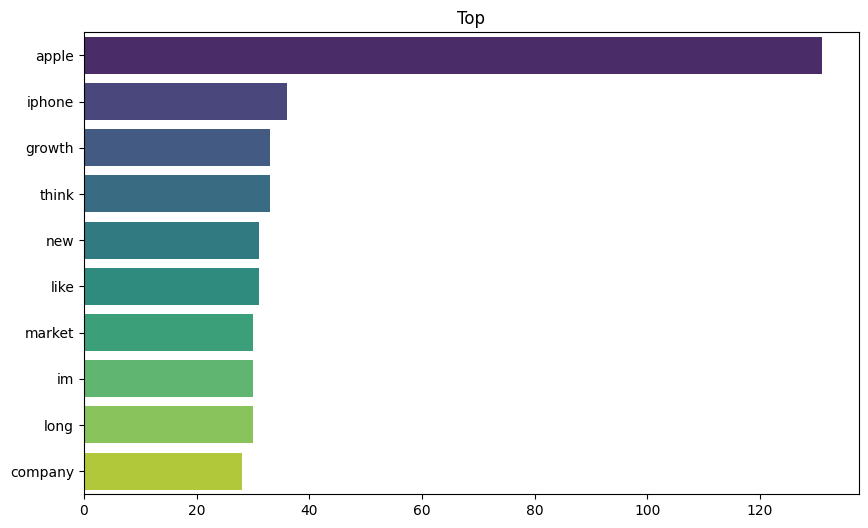

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N most common words (e.g., top 10)
top_n = 10  # Adjust as needed
most_common_words = word_frequencies.most_common(top_n)

# Extract words and frequencies for plotting
words = [word for word, frequency in most_common_words]
frequencies = [frequency for word, frequency in most_common_words]

# Create the bar chart using seaborn (better aesthetics)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=frequencies, y=words, palette="viridis") # Use a color palette
plt.title(f"Top")

The word cloud visualization highlights the most frequently discussed terms in Reddit conversations about Apple. Words like "iphone," "market," "stock," and "year" stand out prominently, reflecting significant interest in Apple's flagship products and market performance. Other terms like "growth," "cash," and "ecosystem" suggest discussions around financial metrics and Apple's integrated product environment. These keywords align with the research objective, showcasing how online sentiment centers around Apple's innovation, financial stability, and future outlook. This analysis provides a basis for correlating sentiment with long-term stock price movements, offering insights into the collective opinion of the online investor community.

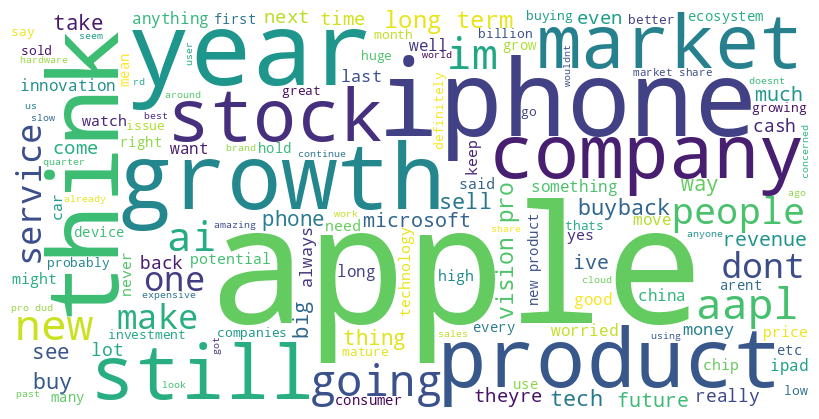

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ... (Your previous code to calculate word frequencies) ...

# Combine all tokens into a single string
all_words = ' '.join([token for tokens_list in comments_df["tokens"] for token in tokens_list])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


The sentiment analysis for Apple stock reveals predominantly positive perceptions among Reddit users. Frequent terms such as "growth," "market," and "product" suggest optimism about Apple's innovation and market position. Words like "long" and "buy" further indicate a favorable investment outlook, with users expressing confidence in Apple's long-term potential. This positive sentiment aligns with Apple's consistent stock price growth over the analyzed period, reflecting investor optimism driven by Apple's strong performance and strategic initiatives. Lets see the real stock price after then.

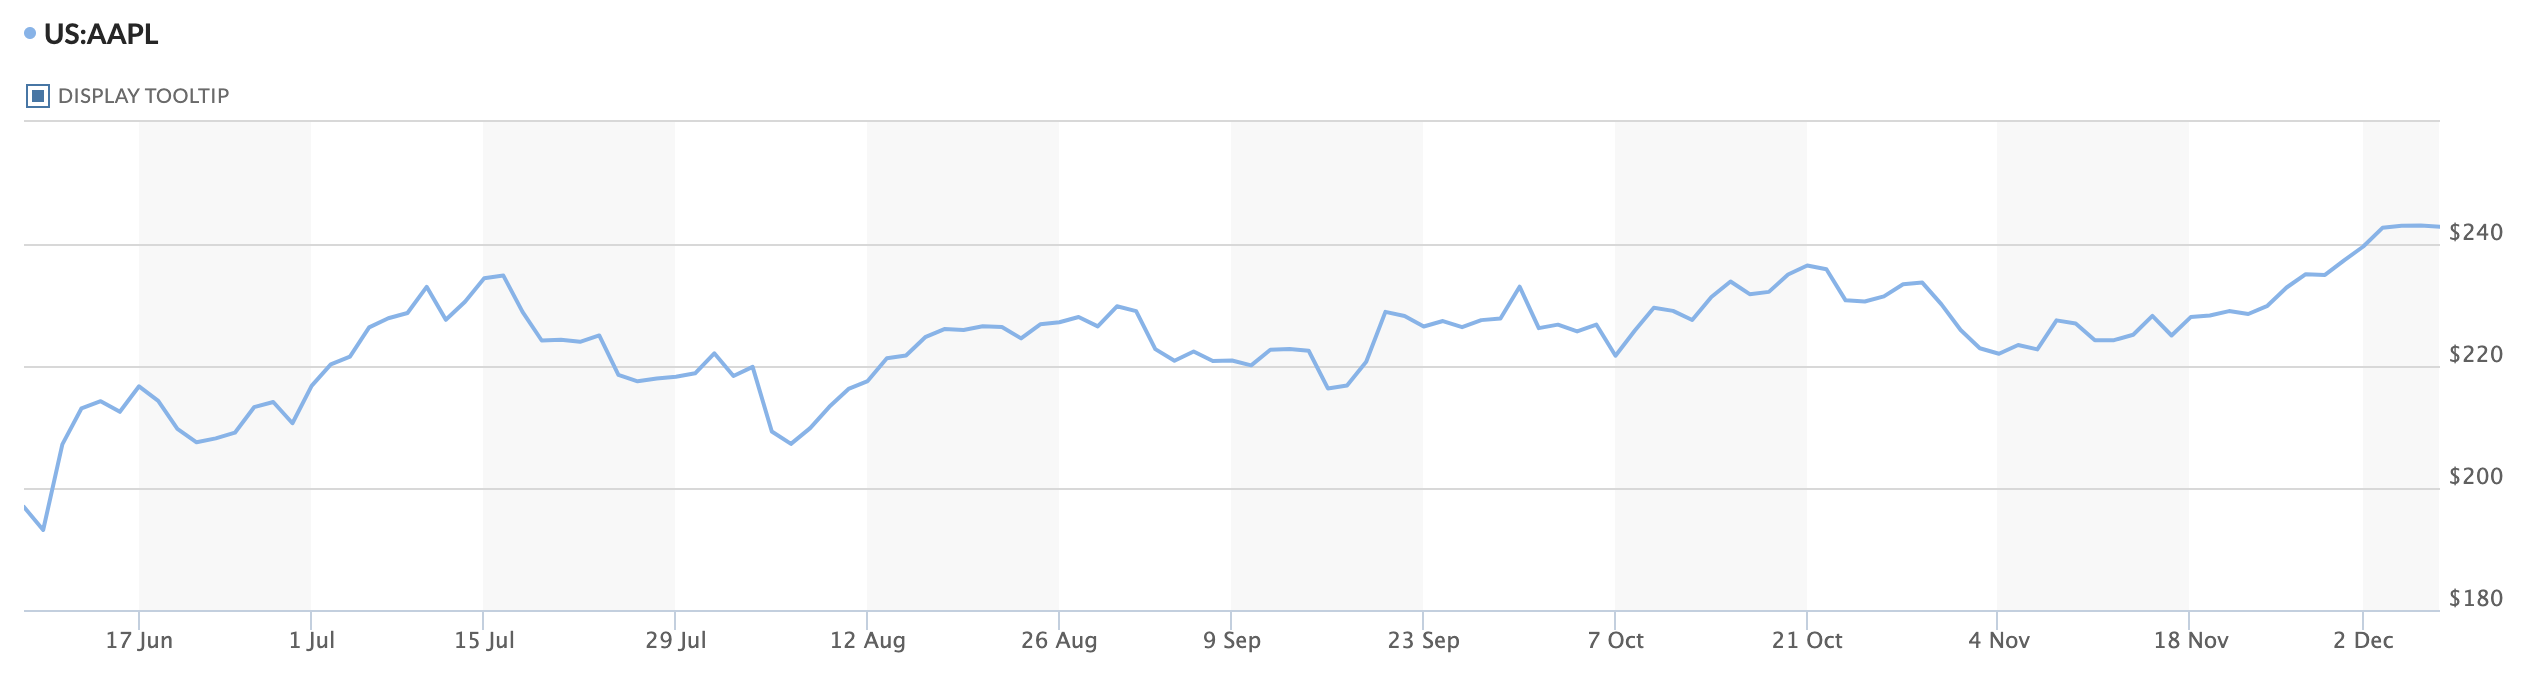

The stock price chart for Apple over the past six months demonstrates a steady upward trend, with some fluctuations along the way. Starting at approximately 180 dollar in mid-June, the price showed consistent growth, peaking at around 240 dollar by early December. Despite occasional dips, particularly noticeable in mid-July and late October, the overall trajectory reflects investor confidence in Apple's performance and future prospects. This price movement aligns with the positive sentiment observed in the Reddit discussions, suggesting that the optimism surrounding Apple’s innovation and market position translates into long-term stock growth.

#**Conclusion**


In this study, we explored the relationship between online sentiment and stock performance, focusing on Apple and Meta as case studies. By analyzing Reddit discussions using advanced techniques like sentiment analysis, word frequency analysis, and TF-IDF, we observed a clear alignment between positive sentiment trends and long-term stock price increases for these companies. The findings demonstrated that Reddit users often express optimism and support for Apple and Meta stocks, which aligns with their consistent price growth over the analyzed six-month period.

Our research highlighted the role of platforms like Reddit in influencing retail investors and shaping market sentiment. Specifically, discussions on r/WallStreetBets provided valuable insights into the perception of these stocks among individual investors. The high frequency of positive terms related to Apple and Meta, combined with consistent price increases, suggests that online sentiment can serve as a valuable indicator of market behavior. For example, keywords such as "buy," "growth," and "long-term" appeared frequently in Reddit discussions, reflecting strong confidence in the future performance of these companies.

These findings underscore the potential of leveraging social media data to understand stock market dynamics. By integrating sentiment analysis with financial data, market analysts and investors can gain a deeper understanding of the drivers behind stock price changes and better anticipate future trends. Additionally, this study demonstrates the increasing influence of retail investor communities on financial markets, highlighting the need for traditional investors and analysts to pay attention to online sentiment as a complementary source of market insights.

However, this research also has limitations. While the results are promising, the analysis relied on a limited dataset and focused on a specific time frame. Expanding the scope of data collection to include other platforms, longer time periods, or additional companies could provide a more comprehensive picture of the relationship between online sentiment and stock performance. Moreover, incorporating more sophisticated modeling techniques, such as machine learning, could enhance the accuracy and predictive power of the findings.

In conclusion, this project reveals the significant impact of online sentiment on stock performance, particularly for high-profile companies like Apple and Meta. By bridging the gap between social media discussions and financial market trends, this study provides valuable insights for both retail investors and financial professionals. To strengthen the persuasiveness of these findings, future research should aim to include more extensive data sources and longer analysis periods to further validate and expand upon these observations.